In [1]:
import torch
import numpy as np
from ANN_model import Features16_NN, Features16_NN2
from Dataset import Features12_dataset
from Utils import loss_plot
from torch.utils.data import DataLoader
from Train import train_model

In [2]:
BATCH_SIZE = 100
RANDOM_STATE = 42
CLEANED = True 

if CLEANED:
    X = np.load('Numeric_feature_dataset/features16_train_cleaned.npy')
    y = np.load('Numeric_feature_dataset/target_train_cleaned.npy')
    print('Using cleaned data')
else:
    X = np.load('Numeric_feature_dataset/features16_train.npy')
    y = np.load('Numeric_feature_dataset/target_train.npy')

train_dataset = Features12_dataset(X, y, train=True, random_state=RANDOM_STATE)
test_dataset = Features12_dataset(X, y, train=False, random_state=RANDOM_STATE)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)
y_scaler_train = train_dataset.get_y_scaler()
y_scaler_test = test_dataset.get_y_scaler()

model = Features16_NN()
model_trained, trainloss, testloss = train_model(model, train_loader, test_loader, y_scaler_train, y_scaler_test, num_epochs=1000, lr=0.01, weight_decay=1e-4, factor=0.5, min_lr=1e-6, patience=50, threshold=0.0001, y_log=False)

Using cleaned data
[Epoch 1/1000] train_loss: 0.066460, test_loss: 0.019746 | train_mape: 18.1263, test_mape: 11.6058
[Epoch 2/1000] train_loss: 0.025374, test_loss: 0.017736 | train_mape: 15.5663, test_mape: 11.3558
[Epoch 3/1000] train_loss: 0.023795, test_loss: 0.017506 | train_mape: 14.5860, test_mape: 11.2924
[Epoch 4/1000] train_loss: 0.021417, test_loss: 0.018150 | train_mape: 13.9376, test_mape: 11.3939
[Epoch 5/1000] train_loss: 0.020798, test_loss: 0.017101 | train_mape: 13.5085, test_mape: 11.2010
[Epoch 6/1000] train_loss: 0.020071, test_loss: 0.015811 | train_mape: 13.1928, test_mape: 11.0474
[Epoch 7/1000] train_loss: 0.020094, test_loss: 0.018080 | train_mape: 12.9584, test_mape: 11.1319
[Epoch 8/1000] train_loss: 0.019229, test_loss: 0.015163 | train_mape: 12.7555, test_mape: 10.9937
[Epoch 9/1000] train_loss: 0.018108, test_loss: 0.015803 | train_mape: 12.5599, test_mape: 10.9012
[Epoch 10/1000] train_loss: 0.018643, test_loss: 0.014655 | train_mape: 12.4209, test_mape

In [3]:
from Utils import save_with_unique_name 
#### 記得改檔名 ####
filename = 'Models/features16_model2.pt'
filename = save_with_unique_name(filename)
torch.save(model_trained.state_dict(), filename)

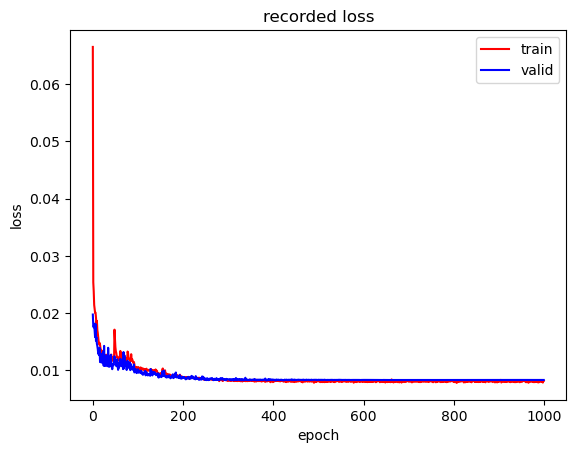

In [4]:
loss_plot(trainloss, testloss)

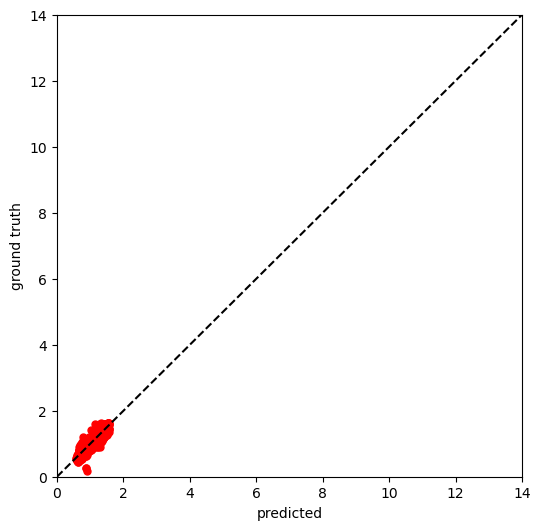

In [5]:
from Utils import true_pred_plot, model_pred

pred_test, true_test = model_pred(model_trained, test_loader, y_scaler_test)
true_pred_plot(pred_test, true_test)

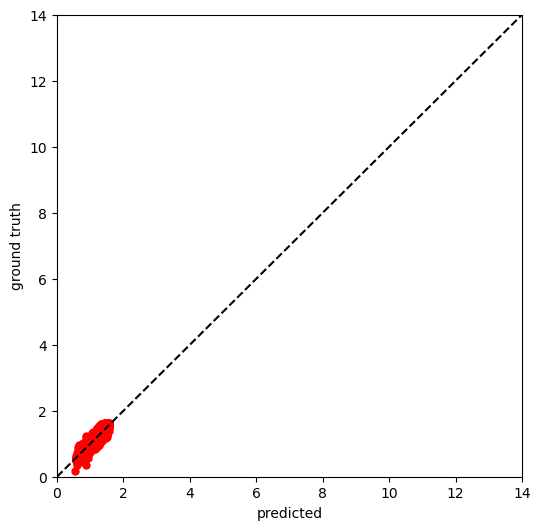

In [6]:
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=False)
pred_train, true_train = model_pred(model_trained, train_loader, y_scaler_train)
true_pred_plot(pred_train, true_train)